# Lab 1

In [57]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Problema 1

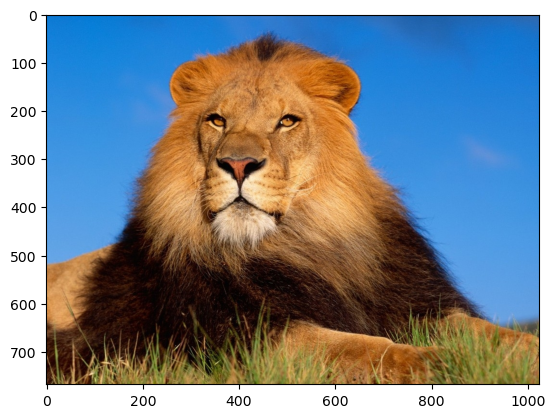

In [4]:
# Imagen para problema 1
img_1 = cv2.imread("ej1.jpg")
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)
plt.show()

In [5]:
def img_reader(img, col_code):
    # lienzo en blanco
    img_out = np.zeros_like(img)
    match col_code:
        case 1:
            mask = [0, 0, 1]
        case 2:
            mask = [0, 1, 0]
        case 3:
            mask = [1, 0, 0]
        case 10:
            mask = [1, 1, 0]
        case 20:
            mask = [0, 1, 1]
        case 30:
            mask = [1, 0, 1]
        case _:
            mask = [1, 1, 1]
    img_out = img*mask 
    return img_out

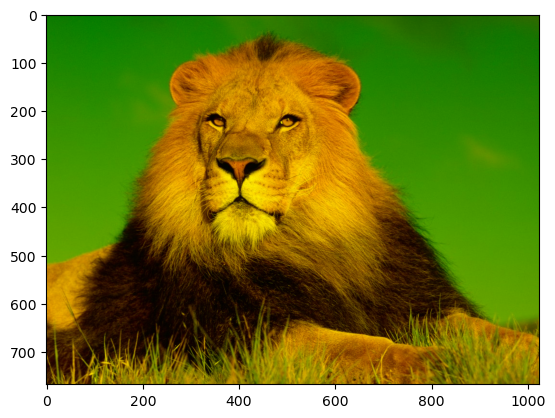

In [8]:
ejercicio1 = img_reader(img_1, 10)
plt.imshow(ejercicio1)
plt.show()

## Problema 2

In [11]:
def img3Dreader(path_name):
    filepath = os.path.join(os.getcwd(), path_name)
    files = os.listdir(filepath)
    for file in files:
        filename = os.path.join(filepath, file)
        if 'verde' in filename:
            img_g = cv2.imread(filename)
        elif 'rojo' in filename:
            img_r = cv2.imread(filename)
        else:
            img_b = cv2.imread(filename)
    return img_r, img_g, img_b

In [13]:
def image3Dmerger(red_img, green_img, blue_img):
    img_nueva = red_img*[1,0,0] + green_img*[0,1,0] + blue_img*[0,0,1]
    return img_nueva

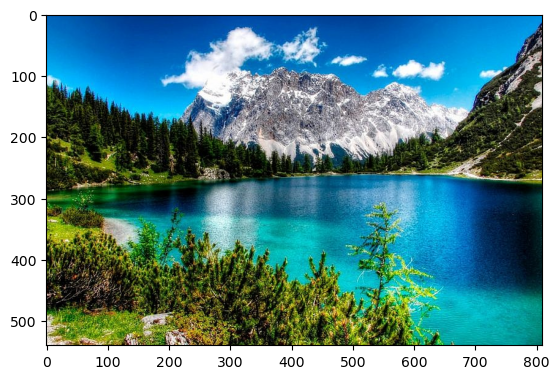

In [15]:
img1_r, img1_g, img1_b = img3Dreader('imagen1')
img1_nueva = image3Dmerger(img1_r, img1_g, img1_b)
plt.imshow(img1_nueva)
plt.show()

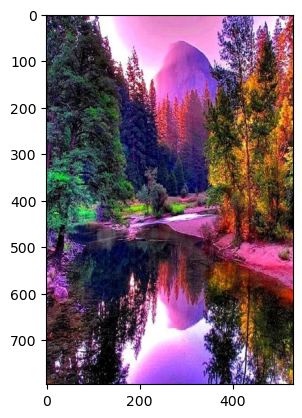

In [17]:
img2_r, img2_g, img2_b = img3Dreader('imagen2')
img2_nueva = image3Dmerger(img2_r, img2_g, img2_b)
plt.imshow(img2_nueva)
plt.show()

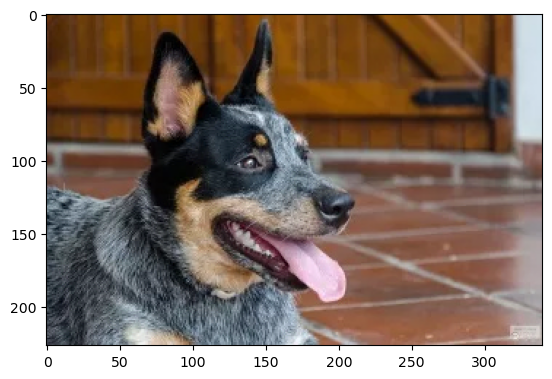

In [19]:
img3_r, img3_g, img3_b = img3Dreader('perro')
img3_nueva = image3Dmerger(img3_r, img3_g, img3_b)
plt.imshow(img3_nueva)
plt.show()

## Problema 3

In [22]:
ej3 = cv2.imread("ejercicio3/ej3.jpg")
ej3 = cv2.cvtColor(ej3, cv2.COLOR_BGR2RGB)

In [24]:
def image3Dsplitter(img):
    # dimensiones de la imagen
    alto = img.shape[0]
    ancho = img.shape[1]
    # lienzos en blanco
    img_gray_red=np.zeros_like(img)
    img_gray_green=np.zeros_like(img)
    img_gray_blue=np.zeros_like(img)

    for i in range(0, alto):
        for j in range(0, ancho):
            pixel = img[i, j]
            red = pixel[0]
            green = pixel[1]
            blue = pixel[2]
            
            img_gray_red[i, j]   = [red, red, red]
            img_gray_green[i, j] = [green, green, green]
            img_gray_blue[i, j]  = [blue, blue, blue]
            
    return img_gray_red, img_gray_green, img_gray_blue

In [26]:
ej3_gray_red, ej3_gray_green, ej3_gray_blue = image3Dsplitter(ej3) 

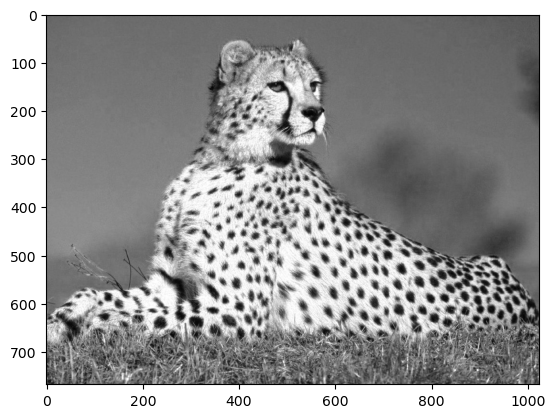

In [27]:
plt.imshow(ej3_gray_red)
plt.show()

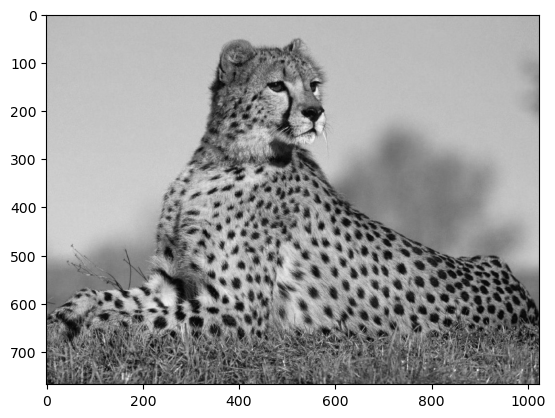

In [30]:
plt.imshow(ej3_gray_green)
plt.show()

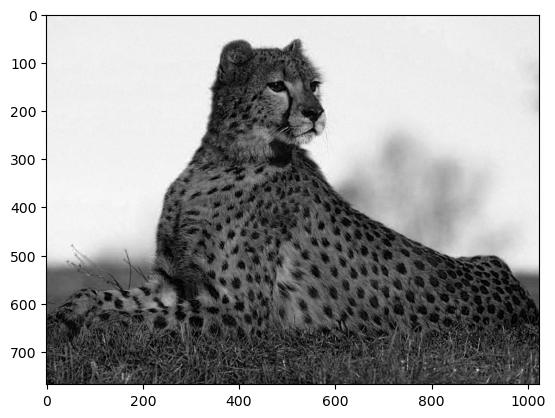

In [32]:
plt.imshow(ej3_gray_blue)
plt.show()

In [36]:
cv2.imwrite("ejercicio3/ej3_gray_red.jpg", ej3_gray_red)
cv2.imwrite("ejercicio3/ej3_gray_green.jpg", ej3_gray_green)
cv2.imwrite("ejercicio3/ej3_gray_blue.jpg", ej3_gray_blue)

True

## Problema 4

In [111]:
def histImg(img):
    df_img = pd.DataFrame(img.reshape(img.shape[0]*img.shape[1], 3), columns=['r','g','b'])
    # dimensiones de la imagen
    alto = img.shape[0]
    ancho = img.shape[1]
    # lienzos en blanco
    gris_aritmetico=np.zeros((alto, ancho, 1))
    # se calcula el gris aritmético
    for i in range(0, alto):
        for j in range(0, ancho):
            pixel = img[i, j]
            red = pixel[0]
            green = pixel[1]
            blue = pixel[2]
            gris_aritmetico[i, j]=pixel.mean()        
    escala_gris = gris_aritmetico.reshape(gris_aritmetico.shape[0]*gris_aritmetico.shape[1])
    # histograma dist rojo
    plt.figure(figsize=(15,3))
    sns.histplot(df_img['r'], color = 'red', alpha=0.5)
    plt.axvline(df_img['r'].mean(), linestyle='--', color='black', label=f'Media: {df_img['r'].mean():.2f}')
    plt.title('Distribución de Rojo')
    plt.legend()
    # histograma dist verde
    plt.figure(figsize=(15,3))
    sns.histplot(df_img['g'], color = 'green', alpha=0.5)
    plt.axvline(df_img['g'].mean(), linestyle='--', color='black', label=f'Media: {df_img['g'].mean():.2f}')
    plt.title('Distribución de Verde')
    plt.legend()
    # histograma dist azul
    plt.figure(figsize=(15,3))
    sns.histplot(df_img['b'], color = 'blue', alpha=0.5)
    plt.axvline(df_img['b'].mean(), linestyle='--', color='black', label=f'Media: {df_img['b'].mean():.2f}')
    plt.title('Distribución de Azul')
    plt.legend()
    plt.show()
    # histograma dist grises
    plt.figure(figsize=(15,3))
    sns.histplot(escala_gris, color = 'gray', alpha=0.5)
    plt.axvline(escala_gris.mean(), linestyle='--', color='black', label=f'Media: {escala_gris.mean():.2f}')
    plt.title('Distribución de Gris')
    plt.legend()
    plt.show()

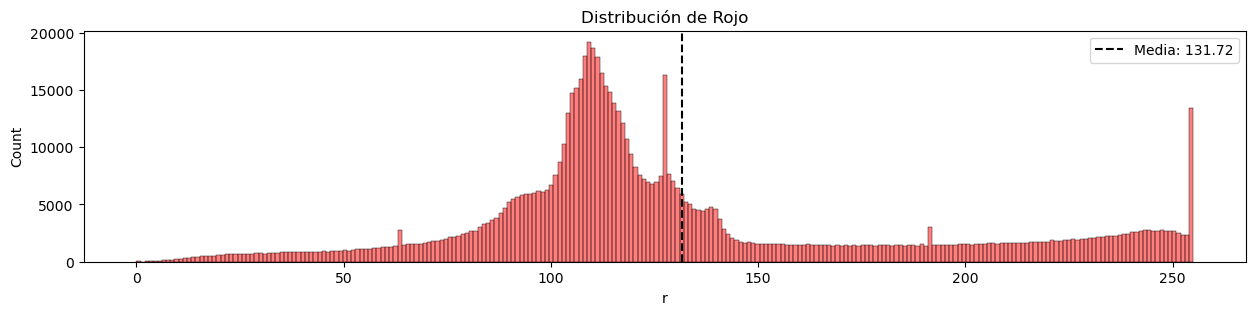

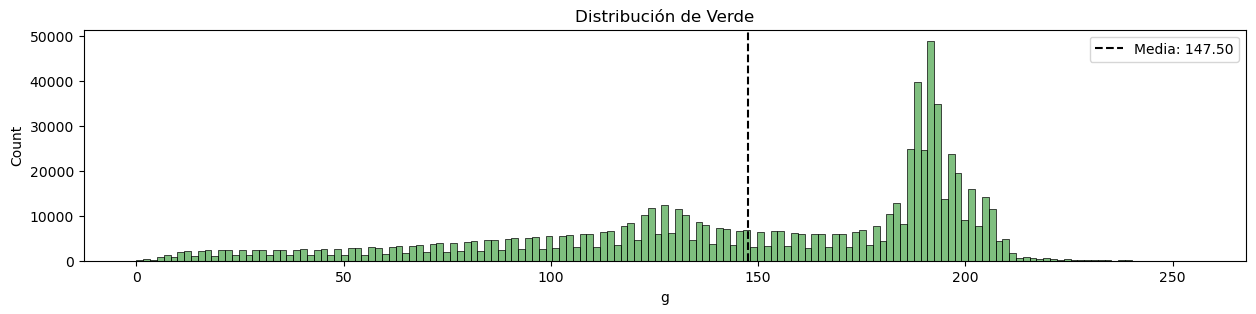

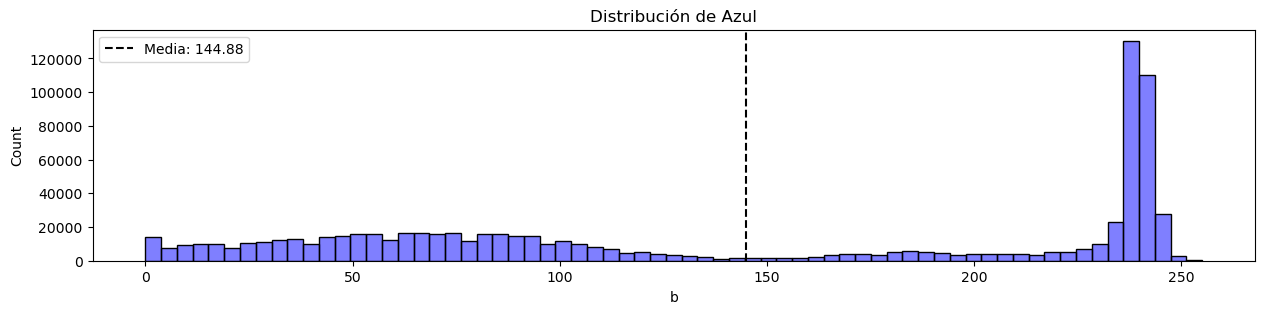

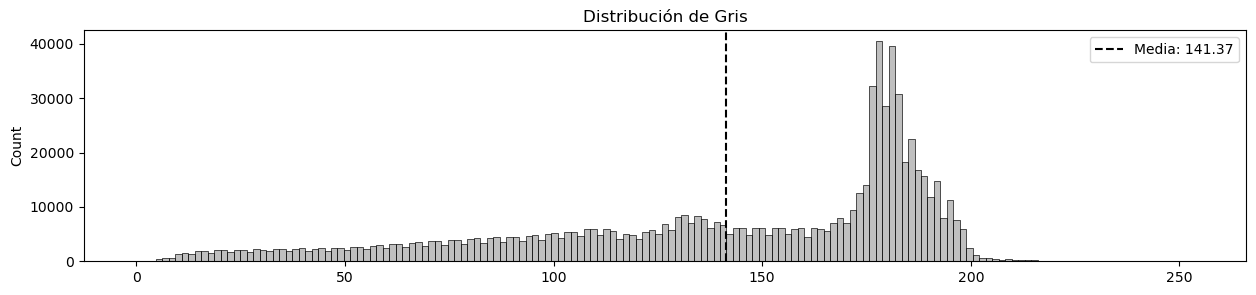

In [113]:
histImg(ej3)

## Problema 5

In [122]:
ej5 = img_1.copy()

In [ ]:
def AvGrayScale(img):
    # dimensiones de la imagen
    alto = ej5.shape[0]
    ancho = ej5.shape[1]
    # lienzos en blanco
    gris_pond=np.zeros((alto, ancho, 1))
    # se calcula el gris ponderado
    img_gris = ej5*[0.3, 0.59, 0.11]
    for i in range(0, alto):
        for j in range(0, ancho):
            pixel = ej5[i, j]
            gris_pond[i, j] = pixel.sum()

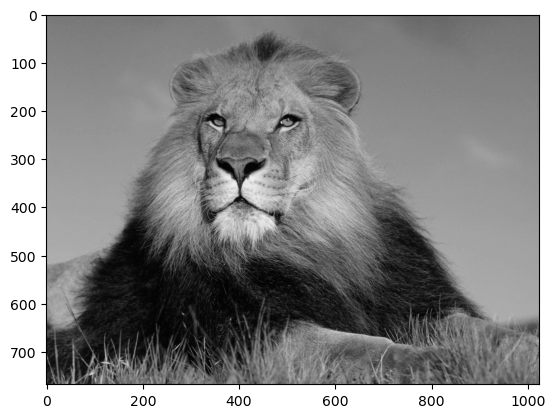

In [130]:
plt.imshow(gris_pond, cmap='gray')
plt.show()

In [115]:
!git add .

In [117]:
!git commit -m "problema 4"

[ft/updt 3b1ae06] problema 4
 1 file changed, 129 insertions(+), 14 deletions(-)


In [119]:
!git push

To https://github.com/jriveramol/Lab1_ProcesamientoImagenes.git
   f484e7e..3b1ae06  ft/updt -> ft/updt
